# Training of phase only SLM quantized #

Figure 4 of the manuscript 

Make also scaling test

*Important, the training is done by a single input because this correspond to the plane wave input in the SLM only implementation*

**Remark run with tensorflow==1.15** 

(pip install tensorflow==1.15)

In [1]:
import sys
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

from utilitiesquantumgates import SLM
from utilitiesquantumgates import quantumgates
from utilitiesquantumgates import quantumgatesinference
from utilitiesquantumgates import utilities
from tensorboardutilities import tensorboardutilities
from datetime import datetime
#%% datatypes
npdatatype=np.complex64
tfdatatype=tf.complex64
tfrealdatatype=tf.float32 # to use double switch aboe to complex128

## Hyperparameters ##

In [2]:
N=3 # reduced dimensions
M=40 # embedding dimension

## Target gate ##

In [3]:
X_np=quantumgates.Xgate(N,npdatatype)
utilities.printonscreennp(X_np)

+0.0+0.0i +1.0+0.0i +0.0+0.0i 
+0.0+0.0i +0.0+0.0i +1.0+0.0i 
+1.0+0.0i +0.0+0.0i +0.0+0.0i 


## Random Uniform for the Complex Medium ##

In [4]:
U_np=quantumgates.randomU(M,npdatatype)
#utilities.printonscreennp(U_np)

## Test training for N=3 and M=5 ##

In [5]:
out=SLM.phaseonly(
            X_np,U_np,
            verbose=2,
            epochs=2000,
            display_steps=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Running with M 40 N 3 ntrain 1 nvalid 1
epoch 0
cost 9.007667541503906
valid cost 9.007667541503906
epoch 100
cost 1.611088752746582
valid cost 1.611088752746582
epoch 200
cost 0.8146945834159851
valid cost 0.8146945834159851
epoch 300
cost 0.7356824278831482
valid cost 0.7356824278831482
epoch 400
cost 0.41102057695388794
valid cost 0.41102057695388794
epoch 500
cost 0.1303718537092209
valid cost 0.1303718537092209
epoch 600
cost 0.023755263537168503
valid cost 0.023755263537168503
epoch 700
cost 0.005815458949655294
valid cost 0.005815458949655294
epoch 800
cost 0.0005793496966362
valid cost 0.0005793496966362
epoch 900
cost 6.114204006735235e-05
valid cost 6.114204006735235e-05
Convergence in validation reached at epoch 900


## Test scalig with ##

Train for varying M 

### Parameters ###

In [6]:
Mmin=5
Mmax=400
step=20
Ms=list()
Nepoch=list()
Cost=list()
count=0

Training loop

In [7]:
for im in range(Mmin,Mmax+1,step):
    Ms.append(im)
    U_np=quantumgates.randomU(im,npdatatype)
    out=\
    SLM.phaseonly(
            X_np,U_np,
            verbose=1,
            epochs=1000,
            display_steps=5)
    Nepoch.append(out['epoch'])
    Cost.append(out['cost'])
    count=count+1
    print('Running with M ' +
          repr(im)+' cost  '+repr(out['cost']))

Running with M 5 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 5 cost  0.007784056477248669
Running with M 25 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 25 cost  0.0002611222444102168
Running with M 45 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 45 cost  0.0007274628733284771
Running with M 65 N 3 ntrain 1 nvalid 1
Convergence in validation reached at epoch 765
Running with M 65 cost  9.139193571172655e-05
Running with M 85 N 3 ntrain 1 nvalid 1
Convergence in validation reached at epoch 840
Running with M 85 cost  8.956656529335305e-05
Running with M 105 N 3 ntrain 1 nvalid 1
Convergence in validation reached at epoch 880
Running with M 105 cost  9.309423330705613e-05
Running with M 125 N 3 ntrain 1 nvalid 1
Convergence in validation reached at epoch 795
Running with M 125 cost  9.247441630577669e-05
Running with M 145 N 3 ntrain 1 nvalid 1
Convergence in validation reached at

Text(0, 0.5, 'cost function')

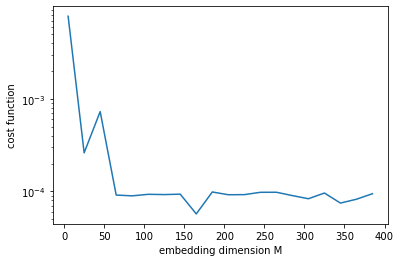

In [8]:
%matplotlib inline
plt.figure(1)
plt.semilogy(Ms,Cost)
plt.xlabel('embedding dimension M')
plt.ylabel('cost function')

In [9]:
plt.savefig('figurescaling.eps', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='eps',
        transparent=False, bbox_inches=None, pad_inches=0.1)

<Figure size 432x288 with 0 Axes>